<h1>Chicago Crimes</h1>
<h3>Tanay, Xynex Kim R.
<br>
BSIT 3A</h3>
<hr>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from  folium.plugins import HeatMap
import warnings 
warnings.filterwarnings('ignore')

In [2]:
chicagoc_df = pd.read_csv('datasets\\Chicago_crimes.csv')

In [3]:
chicagoc_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


<hr>
<h3>Changing from MM/DD/YYYY to MM-DD-YYYY.</h3>

In [4]:
chicagoc_df['Date'] = chicagoc_df['Date'].astype(str)
chicagoc_df['Date'] = chicagoc_df['Date'].replace('/', '-') 
chicagoc_df['Date'] = chicagoc_df['Date'].str.strip()
chicagoc_df['Date'] = pd.to_datetime(chicagoc_df['Date'], dayfirst=True, errors='coerce')

chicagoc_df['Updated On'] = chicagoc_df['Updated On'].astype(str)
chicagoc_df['Updated On'] = chicagoc_df['Updated On'].replace('/', '-') 
chicagoc_df['Updated On'] = chicagoc_df['Updated On'].str.strip()
chicagoc_df['Updated On'] = pd.to_datetime(chicagoc_df['Updated On'], dayfirst=True, errors='coerce')

In [5]:
chicagoc_df.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                             int64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On              datetime64[ns]
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

In [6]:
chicagoc_df['Arrest'] = chicagoc_df['Arrest'].astype('category')
chicagoc_df['Domestic'] = chicagoc_df['Domestic'].astype('category')

<hr>
<h3>Looking for null values and filling them.</h3>

In [7]:
chicagoc_df.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

In [8]:
chicagoc_df['Location Description'] = chicagoc_df['Location Description'].fillna('unaccounted')
chicagoc_df['Community Area'] = chicagoc_df['Community Area'].fillna(chicagoc_df['Community Area'].mode()[0])
chicagoc_df['X Coordinate'] = chicagoc_df['X Coordinate'].fillna(chicagoc_df['X Coordinate'].mode()[0])
chicagoc_df['Y Coordinate'] = chicagoc_df['Y Coordinate'].fillna(chicagoc_df['Y Coordinate'].mode()[0])
chicagoc_df['Latitude'] = chicagoc_df['Latitude'].fillna(chicagoc_df['Latitude'].mean())
chicagoc_df['Longitude'] = chicagoc_df['Longitude'].fillna(chicagoc_df['Longitude'].mean())
chicagoc_df['Location'] = chicagoc_df['Location'].fillna(chicagoc_df['Location'].mode()[0])

In [9]:
chicagoc_df.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

<hr>
<h3>Creating their own column (Year, Month, and Days of the Week) so it can be use separately for the future.</h3>

In [10]:
chicagoc_df['Year'] = chicagoc_df['Updated On'].dt.year
chicagoc_df['Month'] = chicagoc_df['Updated On'].dt.month
chicagoc_df['Day'] = chicagoc_df['Updated On'].dt.day
chicagoc_df['DayOfWeek'] = chicagoc_df['Updated On'].dt.dayofweek 

chicagoc_df['Day'] = 'Weekday'
chicagoc_df.loc[chicagoc_df['DayOfWeek'].isin([4, 5, 6]), 'Day'] = 'Weekend'

In [11]:
chicagoc_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,DayOfWeek
0,13439321,JH237424,2024-04-14,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,1178707.0,1878256.0,2024,2024-12-21 15:40:46,41.821236,-87.619921,"(41.821236024, -87.619920712)",12,Weekend,5
1,13437420,JH234779,2024-04-14,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,1161210.0,1889347.0,2024,2024-12-21 15:40:46,41.852052,-87.683801,"(41.852051675, -87.683800849)",12,Weekend,5
2,13428676,JH224478,2024-04-14,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,1146960.0,1909501.0,2024,2024-12-21 15:40:46,41.907640,-87.735587,"(41.907640473, -87.735587478)",12,Weekend,5
3,13429357,JH225293,2024-04-14,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,1150158.0,1898721.0,2024,2024-12-21 15:40:46,41.877997,-87.724121,"(41.877997275, -87.724120826)",12,Weekend,5
4,13430098,JH226395,2024-04-14,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,1170856.0,1830157.0,2024,2024-12-21 15:40:46,41.689421,-87.650123,"(41.6894214, -87.650123247)",12,Weekend,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,2025-12-04,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1156478.0,1917149.0,2025,2025-04-19 15:41:24,41.928440,-87.700416,"(41.928439867, -87.700415972)",4,Weekend,5
249119,13804023,JJ215813,2025-12-04,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,1175694.0,1842631.0,2025,2025-04-19 15:41:24,41.723545,-87.632040,"(41.723545182, -87.632039508)",4,Weekend,5
249120,13803926,JJ215943,2025-12-04,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,1173850.0,1848976.0,2025,2025-04-19 15:41:24,41.740998,-87.638606,"(41.74099774, -87.638606337)",4,Weekend,5
249121,13803475,JJ215338,2025-12-04,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,1169838.0,1871348.0,2025,2025-04-19 15:41:24,41.802477,-87.652657,"(41.802477219, -87.652657244)",4,Weekend,5


In [12]:
chicagoc_df['Year'].unique()

array([2024, 2025], dtype=int32)

<hr>

<h2>Chicago Crimes Location</h2>

In [134]:
# chicago_loc = chicagoc_df

# chicago_loc = list(zip(chicagoc_df['Latitude'], chicagoc_df['Longitude']))
# chicago_map = folium.Map(locations=[chicagoc_df['Latitude'].mean(), chicagoc_df['Longitude'].mean()], zoom_start=10)
# HeatMap(chicago_loc).add_to(chicago_map)
# chicago_map.save('Chicago_heatmap.html')
# chicago_map

<hr>
<h2>1. How many crimes in total have been recorded in Chicago from the year 2024 to 2025?</h2>

In [14]:
crime_2024 = chicagoc_df[chicagoc_df['Year'] == 2024]
crime_2025 = chicagoc_df[chicagoc_df['Year'] == 2025]

In [15]:
crime_2024.value_counts().sum()

np.int64(180963)

In [16]:
crime_2025.value_counts().sum()

np.int64(68160)

In [17]:
chicagoc_df.value_counts().sum()

np.int64(249123)

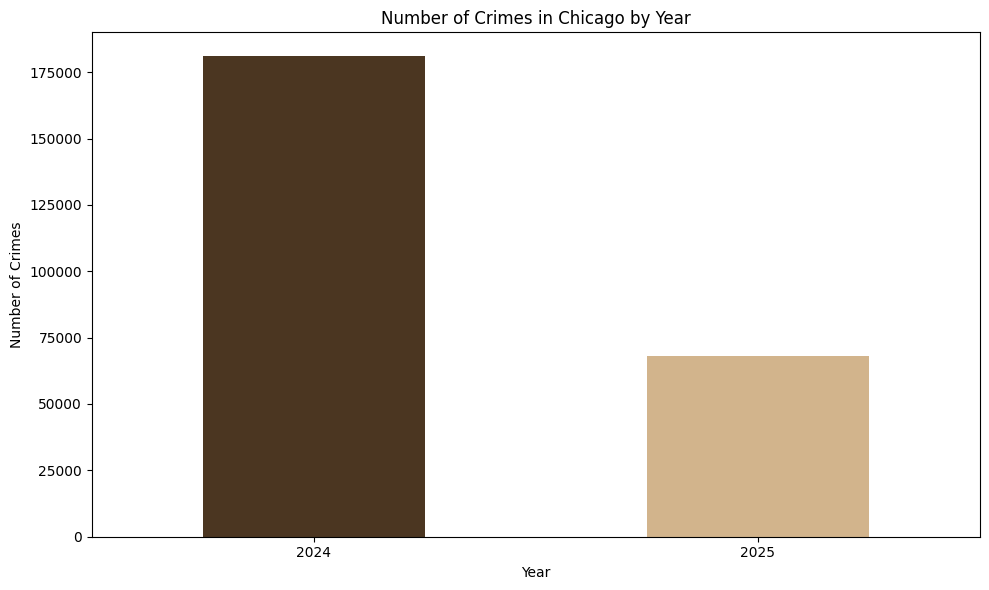

Year
2024    180963
2025     68160
Name: count, dtype: int64


In [18]:
crimes_each_yr = chicagoc_df['Year'].value_counts().sort_index()
crimes_each_yr.plot(kind="bar", figsize=(10, 6), color=["#4B3621", "#D2B48C"])

plt.title("Number of Crimes in Chicago by Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(crimes_each_yr)

<h3>Insight 01: Chicago shows 249,123 numbers of crimes that  had happened  from year 2024 to 2025. Surfing online I've learned that Chicago has a reputation for violent crime and a high number of homicides.</h3>

<h3>Insight 02: The visualization shows that the year 2024 had the highest rate of crimes recorded, 180,963 in total.</h3>
<p>Acoording to Council on Criminal Justice (2025) "Chicago still struggles with crime. In <strong>2024</strong>, Chicago recorded significantly more murders than other cities over 100,000 people: 573 to rank first in the nation compared to 325 in second-place New York City.
The highest summer peak occurred in June 2024, with 1,803 reported aggravated assault incidents (67.7 per 100,000 residents). Aggravated assaults then trended down from the peak, and in June 2025, there were 1,554 reported incidents (57.1 per 100,000) – a 16% reduction from the June 2024 peak."</p>

<h3>Insight 03: Looking at the visualization above there the year 2025 unlike to year 2024 have the fewer counts of crime with the total of 68,160, looks like the Government probably handling the situation there properly unlike the past few years.</h3>
<p>So far this year, violent crime is down 21.5% from 2024, according to city data based on a similar list of violent crime categories. </p>
<p>
(WBEZ, 2025) found summer <strong>2025</strong> saw the fewest homicides in Chicago in 60 years, while overall violent crime remained near its lowest point in at least four decades.
</p>
<hr>

<h2>2. Which month have the highest counts of crime?</h2>

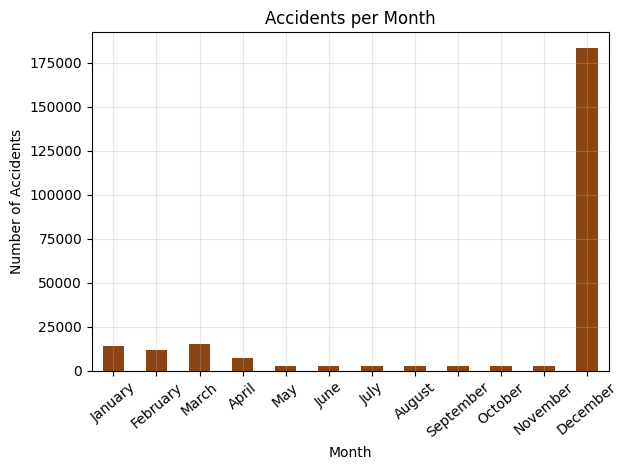

Month
January       13760
February      11601
March         15011
April          7252
May            2708
June           2746
July           2508
August         2565
September      2774
October        2467
November       2601
December     183130
Name: count, dtype: int64


In [19]:
month_crime = chicagoc_df['Month'].value_counts().sort_index()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
month_crime.index = month_crime.index.map(month_names)

month_crime.plot(kind='bar', color='#8b4513')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=40)
plt.tight_layout()
plt.grid(alpha=0.3)
plt.show()

print(month_crime)

<h3>Insight 01: December has the highest number of crimes, with over 183,130 cases. This is much more than any other month in the year. It shows that something happens during December that leads to a big rise in crime, possibly related to the holiday season or end-of-year activities.</h3>

<h3>Insight 02: March and January also have high crime numbers, with over 15,011 and 13,760 cases. This suggests that the beginning of the year sees more criminal activity, which could be due to colder weather, fewer outdoor activities, or other seasonal reasons.</h3>

<h3>Insight 03: From April to November, the number of crimes is much lower and stays fairly steady, between about 7,252 and 2,601 cases. This could mean that crime tends to drop in the middle of the year, possibly because of better weather, school being in session, or anything to prevent people from doing bad things that help keep things under control.</h3>

<hr>
<h2>3. What is the most common crime type who had the highest number recorded from year 2024-2025?</h2>

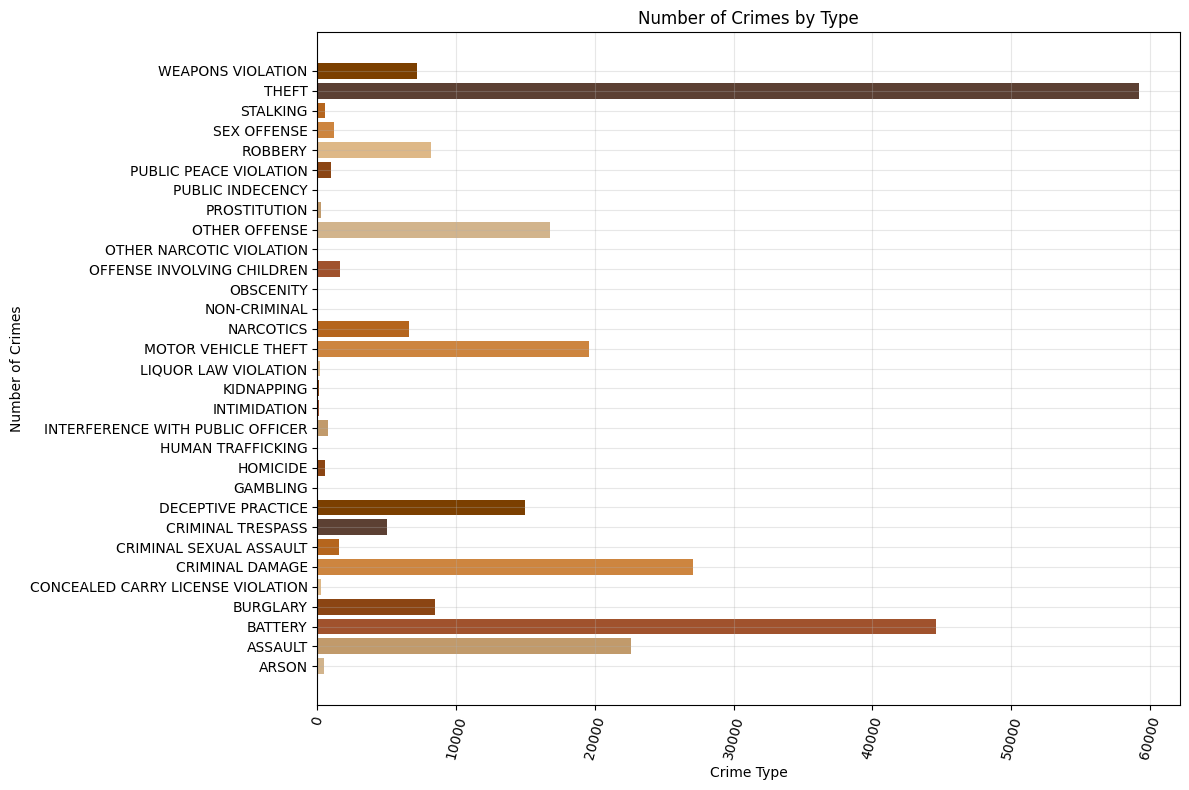

Summary of Crime Types and their Counts 
Primary Type
ARSON                                  452
ASSAULT                              22615
BATTERY                              44579
BURGLARY                              8443
CONCEALED CARRY LICENSE VIOLATION      249
CRIMINAL DAMAGE                      27094
CRIMINAL SEXUAL ASSAULT               1573
CRIMINAL TRESPASS                     5045
DECEPTIVE PRACTICE                   14991
GAMBLING                                18
HOMICIDE                               553
HUMAN TRAFFICKING                       24
INTERFERENCE WITH PUBLIC OFFICER       771
INTIMIDATION                           145
KIDNAPPING                             105
LIQUOR LAW VIOLATION                   192
MOTOR VEHICLE THEFT                  19604
NARCOTICS                             6627
NON-CRIMINAL                             4
OBSCENITY                               53
OFFENSE INVOLVING CHILDREN            1597
OTHER NARCOTIC VIOLATION                 7


In [20]:
primaryt_df = chicagoc_df.groupby('Primary Type')['Year'].count()

colors = [
    '#d2b48c', '#c19a6b', '#a0522d', '#8b4513', '#deb887',
    '#cd853f', '#b5651d', '#5c4033', '#7b3f00', '#a0522d', '#8b4513'
]
colors = colors[:len(primaryt_df)]

plt.figure(figsize=(12, 8))
plt.barh(primaryt_df.index, primaryt_df.values, color=colors)

plt.title("Number of Crimes by Type")
plt.xlabel("Crime Type")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=75)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("Summary of Crime Types and their Counts ")
print(primaryt_df)

<h3>Insight 01: Most Common Crime<br>
<br>The most recorded crime is <strong>THEFT</strong> with 59,201 cases, followed by <strong>BATTERY</strong> with 44,579 and <strong>CRIMINAL DAMAGE</strong> with the total of 27,094.</h3>
<p>-This gathered info only shows that people should have the awareness and better keep their selfs to safe and far from being harmed. Especially the <strong>BATTERY</strong> which happens at home. </p>
<h3>Insight 02: Least Common Crime<br>
<h3>Are the <strong>NON-CRIMINAL</strong> with 4 crime records only, next is <strong>OTHER NARCOTIC VIOLATION</strong> with 7 records and lastly is the <strong>PUBLIC INDECENCY</strong> 13 only.</h3>
<p>-Only means that this phenomenon don't happen usually probably caused by an accident and not intentionally.</p>
<h3>Insight 03: Vehicle Crimes
Motor Vehicle Theft is very common with 19,664 cases. This means many people’s cars get stolen, so having stronger security for vehicles is important.</h3>
<h3>Insight 04: Drug Crimes
There are 6,627 cases of Narcotics. This shows that drug problems are still a big issue in the community and may cause other crimes too.</h3>
<h3>Insight 05: Rare but Dangerous Crimes
Crimes like Kidnapping (145 cases), Human Trafficking (24 cases), and Homicide (553 cases) don’t happen often, but when they do, they are very serious and dangerous.</h3>



<h2>4. What are the three common incidents that are usually to happened at the Apartment Area?</h2>

In [21]:
for x in chicagoc_df['Location Description'].unique():
    print(x)

APARTMENT
COMMERCIAL / BUSINESS OFFICE
STREET
RESIDENCE
RESIDENCE - PORCH / HALLWAY
RESTAURANT
HOSPITAL BUILDING / GROUNDS
ATHLETIC CLUB
PARKING LOT / GARAGE (NON RESIDENTIAL)
VEHICLE NON-COMMERCIAL
SIDEWALK
OTHER (SPECIFY)
SCHOOL - PUBLIC BUILDING
DRIVEWAY - RESIDENTIAL
BAR OR TAVERN
ALLEY
DRUG STORE
SMALL RETAIL STORE
RESIDENCE - GARAGE
PARK PROPERTY
CONVENIENCE STORE
HOTEL / MOTEL
SCHOOL - PUBLIC GROUNDS
BOAT / WATERCRAFT
CHA PARKING LOT / GROUNDS
POLICE FACILITY / VEHICLE PARKING LOT
AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA
AIRPORT PARKING LOT
AIRPORT EXTERIOR - NON-SECURE AREA
AIRPORT TERMINAL UPPER LEVEL - SECURE AREA
BANK
CTA PARKING LOT / GARAGE / OTHER PROPERTY
DEPARTMENT STORE
VACANT LOT / LAND
CHURCH / SYNAGOGUE / PLACE OF WORSHIP
NURSING / RETIREMENT HOME
GAS STATION
RESIDENCE - YARD (FRONT / BACK)
GROCERY FOOD STORE
CTA TRAIN
AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA
AIRPORT EXTERIOR - SECURE AREA
CEMETARY
CTA BUS
CTA STATION
CTA PLATFORM
CHA APARTMENT
AIRPORT TER

In [22]:
apartment_df = chicagoc_df[chicagoc_df['Location Description'] == 'APARTMENT']

In [23]:
apartment_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,DayOfWeek
0,13439321,JH237424,2024-04-14,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,1178707.0,1878256.0,2024,2024-12-21 15:40:46,41.821236,-87.619921,"(41.821236024, -87.619920712)",12,Weekend,5
5,13429030,JH224976,2024-04-14,062XX S MICHIGAN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,1178263.0,1863570.0,2024,2024-12-21 15:40:46,41.780946,-87.621995,"(41.780946398, -87.621995369)",12,Weekend,5
13,13431155,JH227704,2024-04-14,009XX N ASHLAND AVE,1330,CRIMINAL TRESPASS,TO LAND,APARTMENT,False,False,...,1165550.0,1906586.0,2024,2024-12-21 15:40:46,41.899266,-87.667381,"(41.899265722, -87.667380963)",12,Weekend,5
17,13429302,JH225193,2024-04-14,009XX E 80TH ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,...,1183703.0,1852152.0,2024,2024-12-21 15:40:46,41.749489,-87.602407,"(41.749489076, -87.602407167)",12,Weekend,5
24,13440865,JH239248,2024-04-14,007XX E 133RD ST,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,True,...,1183678.0,1817496.0,2024,2024-12-21 15:40:46,41.654389,-87.603575,"(41.654389164, -87.60357486)",12,Weekend,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249109,13803864,JJ215663,2025-12-04,005XX S CAMPBELL AVE,0810,THEFT,OVER $500,APARTMENT,False,False,...,1159818.0,1897527.0,2025,2025-04-19 15:41:24,41.874527,-87.688684,"(41.874527192, -87.688684439)",4,Weekend,5
249115,13803957,JJ215827,2025-12-04,073XX S EVANS AVE,0610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False,...,1182493.0,1856604.0,2025,2025-04-19 15:41:24,41.761734,-87.606703,"(41.76173395, -87.606703265)",4,Weekend,5
249117,13804560,JJ216693,2025-12-04,006XX N LONG AVE,0810,THEFT,OVER $500,APARTMENT,False,False,...,1140207.0,1903764.0,2025,2025-04-19 15:41:24,41.892024,-87.760535,"(41.892023917, -87.760535384)",4,Weekend,5
249118,13805239,JJ217509,2025-12-04,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1156478.0,1917149.0,2025,2025-04-19 15:41:24,41.928440,-87.700416,"(41.928439867, -87.700415972)",4,Weekend,5


In [24]:
apartment_prim = apartment_df['Primary Type'].value_counts().head(3)
apartment_prim

Primary Type
BATTERY    14580
THEFT       7513
ASSAULT     5746
Name: count, dtype: int64

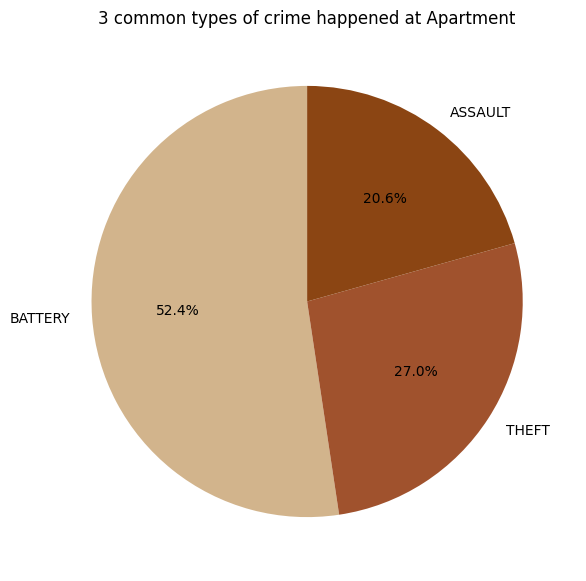

Primary Type
BATTERY    14580
THEFT       7513
ASSAULT     5746
Name: count, dtype: int64


In [25]:
colors_each_type = ['#d2b48c', '#a0522d', '#8b4513'] 
plt.pie(
    apartment_prim,
    labels=apartment_prim.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors_each_type
)
plt.gcf().set_size_inches(10, 7)
plt.title('3 common types of crime happened at Apartment')
plt.show()

print(apartment_prim)

<h3>Insight 01: <strong>Battery</strong> is the most common crime, with 14,580 reported cases, which is much higher than both theft and assault. This shows that physical violence, like hitting or attacking someone, happens a lot and is a serious problem in the area.</h3>

<h3>Insight 02: <strong>Theft and assault</strong> are also major concerns, with 7,513 and 5,746 cases. Theft shows that stealing is still a big issue, while assault means many people are being threatened with harm. These numbers show that both violence and property crime are affecting the community and need attention from local leaders and police.</h3>

<h3>Insights 03: Battery makes up over <u>half (52.4%)</u> of all crimes in apartments, which means more than 1 in 2 cases involve physical violence.</h3>

<h3>Insight 04: Theft accounts for <u>27.1%</u>, nearly 3 out of 10 cases. Since apartments are often crowded with residents and visitors, it suggests that security measures like CCTV, guards, or stronger locks may be lacking.</h3>

<h3>Insight 05:  Assault, at <u>20.6%</u>, though smaller than battery, still represents 1 in 5 incidents. This points to ongoing issues of personal disputes and threats that need community awareness and prevention programs.</h3>

<hr>
<h2>Homicide refers to a person killing another person, including lawfully. Chicago has reported the most homicides of all US cities every year since 2012, according to FBI data crunched by Jeff Asher, a crime data analyst for AH Datalytics.
    
<br>5. In a crime Homicide where do you think it always happened and are the people involved got arrested?

</h2>

In [93]:
homicide_df = chicagoc_df[chicagoc_df['Primary Type'] == 'HOMICIDE']
homicide_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,DayOfWeek
53,28073,JH224200,2024-04-14 00:27:00,035XX W HARRISON ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,1152788.0,1897131.0,2024,2024-04-22 15:41:49,41.873583,-87.714506,"(41.873582511, -87.714506124)",4,Weekday,6
493,28076,JH224904,2024-04-14 16:08:00,009XX N LAVERGNE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,...,1142849.0,1905993.0,2024,2024-04-22 15:41:49,41.898092,-87.750777,"(41.898091745, -87.750776759)",4,Weekday,6
857,28074,JH225503,2024-04-15 02:22:00,016XX W 82ND ST,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,...,1166875.0,1850337.0,2024,2024-04-23 15:41:34,41.744884,-87.664123,"(41.744884198, -87.664123445)",4,Weekday,0
1455,28075,JH226744,2024-04-15 22:38:00,002XX E 111TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False,...,1179719.0,1831409.0,2024,2024-04-23 15:41:34,41.692660,-87.617638,"(41.692659589, -87.617637943)",4,Weekday,0
2592,28077,JH228927,2024-04-17 15:29:00,046XX S WASHTENAW AVE,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,False,False,...,1159150.0,1873725.0,2024,2024-04-25 15:41:50,41.809226,-87.691790,"(41.809225589, -87.69178982)",4,Weekday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239832,28652,JJ196797,2025-03-27 16:51:00,047XX W MONROE ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,1144892.0,1899148.0,2025,2025-04-04 15:41:31,41.879270,-87.743446,"(41.879269958, -87.743445744)",3,Weekend,3
240478,28653,JJ198021,2025-03-28 18:13:00,028XX S KOMENSKY AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,1149838.0,1884889.0,2025,2025-05-04 15:40:58,41.840047,-87.725655,"(41.840046818, -87.72565526)",3,Weekend,4
242228,28654,JJ201117,2025-03-31 12:30:00,080XX S PAULINA ST,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,False,...,1166412.0,1851310.0,2025,2025-08-04 15:41:35,41.747564,-87.665792,"(41.747564118, -87.66579229)",3,Weekday,0
245463,28655,JJ207551,2025-05-04 20:09:00,013XX W 76TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,False,False,...,1168761.0,1854390.0,2025,2025-04-13 15:41:18,41.755966,-87.657096,"(41.755965725, -87.65709614)",5,Weekend,6


In [27]:
homi = homicide_df.groupby(['Location Description', 'Arrest']).size().unstack()

In [28]:
homi

Arrest,False,True
Location Description,,
ABANDONED BUILDING,0,1
ALLEY,39,4
APARTMENT,45,28
AUTO,10,1
BARBER SHOP/BEAUTY SALON,1,0
BASEMENT,1,1
CHA APARTMENT,4,2
CHA GROUNDS,3,0
CHA HALLWAY,1,0


In [29]:
homicide_tro = homicide_df['Arrest'] == 'True'
homicide_tro.mode()

0    False
Name: Arrest, dtype: bool

In [30]:
homicide_ld = homicide_df['Location Description'].mode()
homicide_ld

0    STREET
Name: Location Description, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

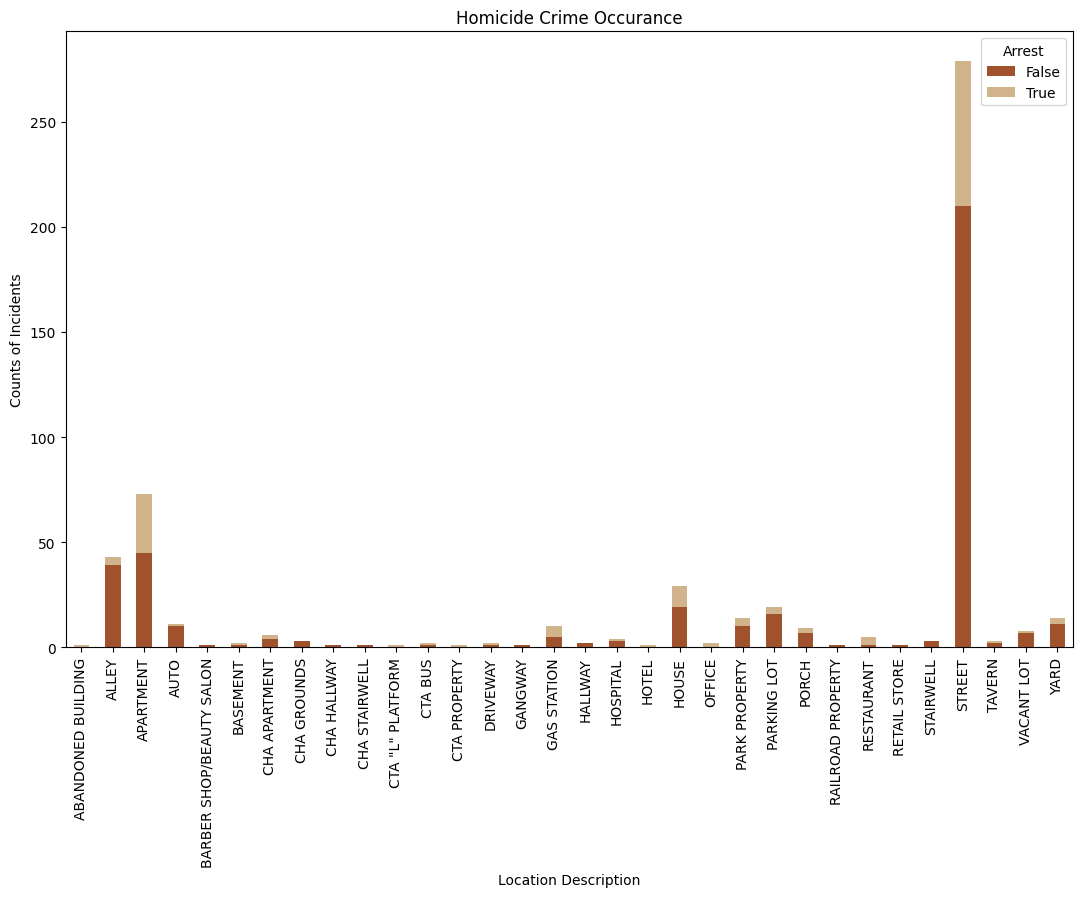

In [31]:
homi.plot(kind='bar', stacked = True, color=['#a0522d', '#d2b48c'])
plt.title('Homicide Crime Occurance')
plt.xlabel('Location Description')
plt.ylabel('Counts of Incidents')
plt.gcf().set_size_inches(13,8)
plt.show


<h3>Insight 01:<br> 
<br>First of all our target here is the specific place where this common crime that people often heard was being the centered of attention, the <strong>HOMICIDE</strong>. I was really thinking where is the often place this type of incident happens and it turns out to be in the streets. The BBC (2025) says that <i>In 2024, the CPD recorded <u>591 homicides</u>, a term which includes both murder and manslaughter. The FBI has a lower number for last year of 461, which crime analyst Jeff Asher says is because the CPD has under-reported the number of homicides to the agency in recent years</i> </h3> 

<h3>Insight 02:<br>
<br>Apparently when the year 2025 came the record of Homicide Rates in Chicago, from January 2018 – June 2025.
<br>In June 2025, there were 36 reported homicides (1.3 per 100,000), a 65% reduction from the July 2021 peak. In the first half of 2025 (January-June), Chicago's homicide rate was 33% lower than it was for the same period in 2024. This seems that the counts of Homicide in this year have been decreased, much look like that it was taken under the authoritive's care, according to <i>Council on Criminal Justice</i>.</h3>

<h3>Insight 03:<br>
<br>The visualization clearly shows that it depends on what happened if the people involved are gonna taken arrest by the police also depends on the situation but most probably like those who cause the harm or the one who brings harm are more likely to get arrested by the police, as an example above the homicide at the streets, it has 210 records but the count of arrested is only 69, hence at the end it is still depends on the situation and the harm.
</h3>

<h3>Insight 04:<br>
<br>As expected the appartment had the highest number of involved where they are getting arrested, it is because of the environment a notorious place where an incident like this happened most of the time. Next place after apartment is the alley, same as apartment, dangerous also especially at night.
</h3>

<h3>Insight 05:<br>
<br>An article was written about homicide that talks about it happening mostly at streets saying that Chicago’s homicide victims in 2024 are often young, Black and male.
Most homicide victims in Chicago died as the result of gunshot wounds. Rumore, K. (2024, December 3). <i>Chicago Tribune</i>, Yahoo.
It is sad to think that this kind of crime commonly happened to those people that it seems like something to do about their race stuff, just hoping someday that they will put a solution regarding to this problem.
</h3>
<hr>

<h2>6. Which crimes are most associated with arrest?</h2>

In [40]:
assoc_arrest = chicagoc_df.groupby(['Primary Type', 'Arrest']).size().unstack()
assoc_arrest

Arrest,False,True
Primary Type,,
ARSON,427,25
ASSAULT,20115,2500
BATTERY,36932,7647
BURGLARY,8027,416
CONCEALED CARRY LICENSE VIOLATION,3,246
CRIMINAL DAMAGE,25987,1107
CRIMINAL SEXUAL ASSAULT,1533,40
CRIMINAL TRESPASS,3569,1476
DECEPTIVE PRACTICE,14545,446


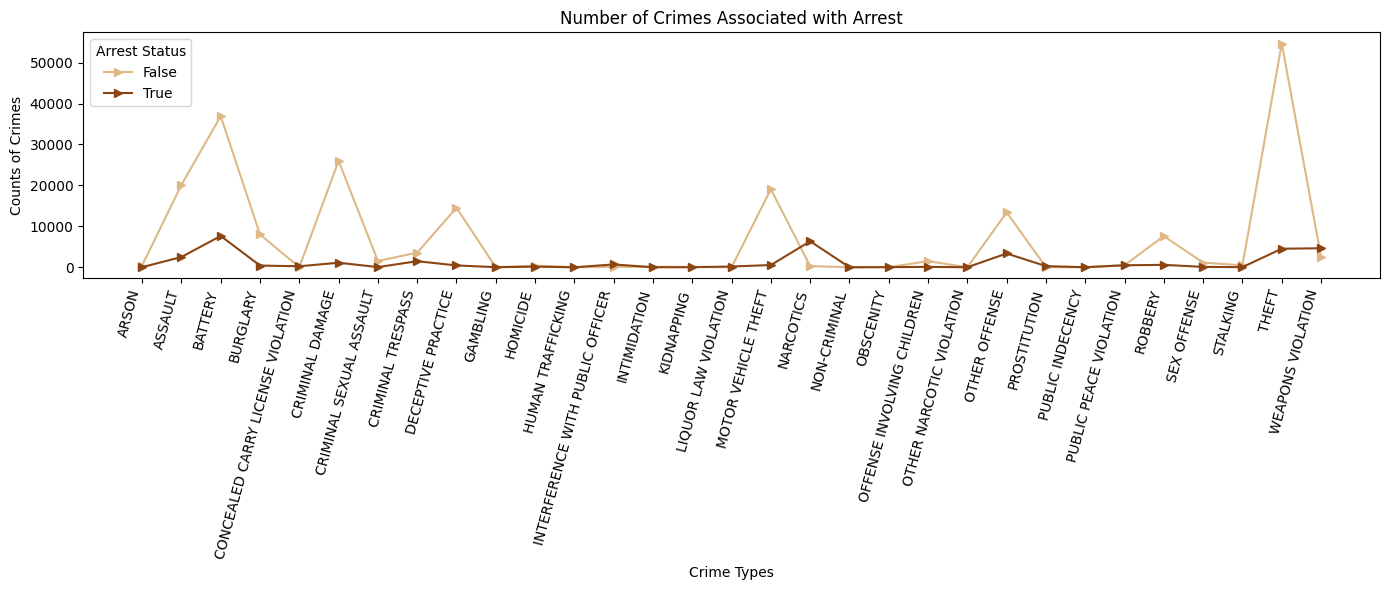

In [53]:
colors = {
    True: '#8B4513',  
    False: '#DEB887'   
}

plt.figure(figsize=(14, 6))

for arrest_status in assoc_arrest.columns:
    plt.plot(
        assoc_arrest.index, 
        assoc_arrest[arrest_status], 
        marker='>', 
        linestyle='-', 
        label=str(arrest_status),     
        color=colors[arrest_status]
    )

plt.title("Number of Crimes Associated with Arrest")
plt.xlabel("Crime Types")
plt.ylabel("Counts of Crimes")
plt.xticks(rotation=75, ha='right') 
plt.legend(title='Arrest Status')    
plt.tight_layout()
plt.show()

<h3>Insight 01: Most Common Crime with the Highest Arrests<br>
<br>Battery is one of the most common crimes in Chicago, with 36,932 total cases. Out of those, 7,647 led to arrests. While the arrest rate isn't very high, it's the crime with the most arrests in total numbers. This shows that even though many battery cases happen, police still manage to arrest thousands of suspects.</h3>

<h3>Insight 02: Most Common Crime with the Lowest Arrests<br>
<br>Kidnapping is one of the less common crimes in the dataset, with 99 total cases, but what stands out is that only 6 arrests were made. 
This could suggest that kidnapping cases are hard to investigate, or that it's difficult for police to find enough evidence or witnesses. It also shows that even serious crimes don't always lead to someone being caught, which can be worrying for public safety.</h3>

<h3>There's really nothing unsual to the next insight but I just want to know the situation about these two familiar crimes to me. :DD</h3>

<h3>Insight 03: Motor Vehicle Theft Incidents<br>
<br>Motor vehicle theft had 19,601 reported cases, but only 543 arrests. That’s a very low arrest rate compared to how often it happens. Cars getting stolen is clearly a big issue, but it’s also tough to catch the person responsible. </h3>
<p>Motor vehicle thefts, overall, dropped 27% in 2024, according to a CBS News Chicago analysis of Chicago Police data. 

The trend continues this year. Through May 4, car thefts are down 35%. (CBS News Chicago, 2025).</p>

<h3>Insight 04: Prostitution<br>
<br>There were only 14 prostitution cases, but 273 of them led to an arrest. That’s a very high arrest rate, showing that when prostitution is reported, police almost always take action and make an arrest.</h3>
<hr>

<h2>7. Which crime types are mostly domestic?</h2>

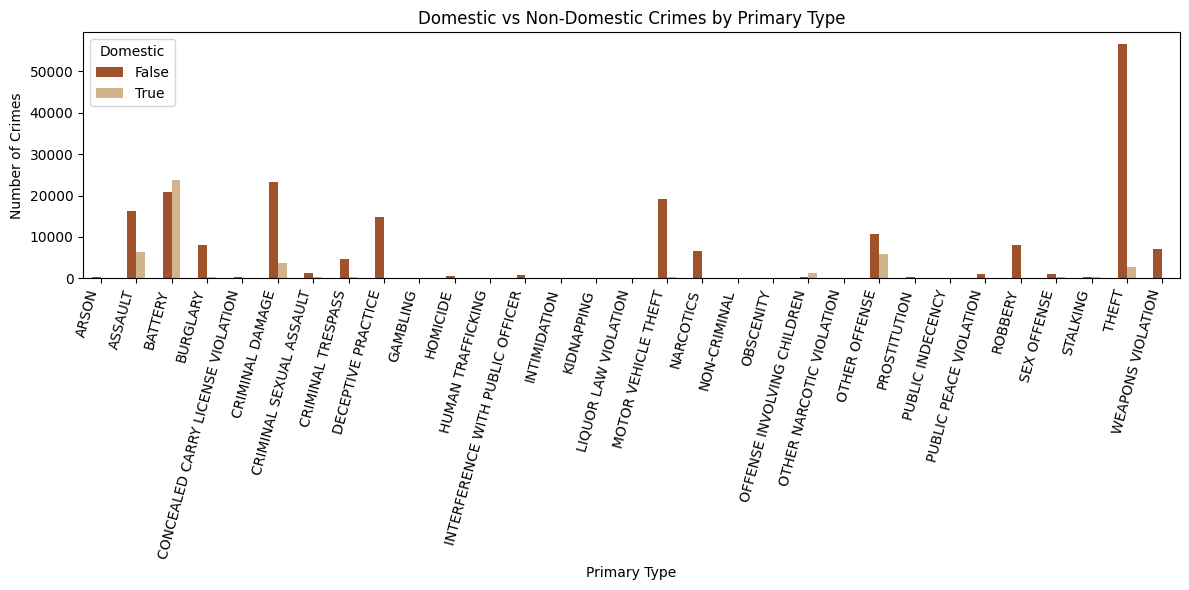

In [77]:
chicagoc_df = chicagoc_df.dropna(subset=['Primary Type'])
domestic_counts = chicagoc_df.groupby(['Primary Type', 'Domestic']).size().unstack()

domestic_counts.plot(kind = 'bar', figsize = (12, 6), color = ['#a0522d', '#d2b48c'])
plt.title('Domestic vs Non-Domestic Crimes by Primary Type')
plt.xlabel('Primary Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation = 75, ha = 'right')
plt.tight_layout()
plt.show()

<h3>Insight 01: The chart shows crimes in Chicago split into domestic and non-domestic. Theft is the most common crime, mostly non-domestic. Battery and assault are also high, and battery has more domestic cases than other crimes, often happening at home. Property crimes like burglary and car theft are almost all non-domestic, while drug and weapon cases mostly happen in public. Overall, property crimes happen the most, but domestic violence is still a serious issue.</h3>

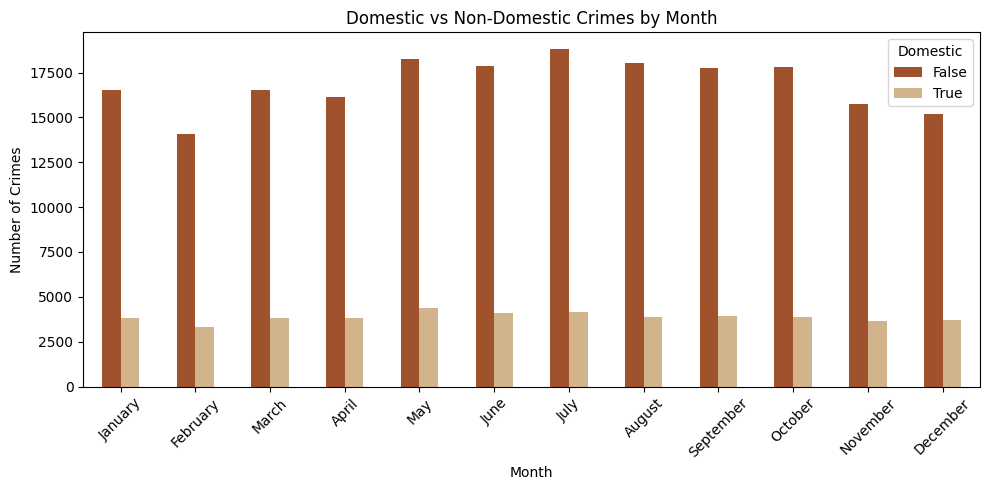

Domestic   False  True
Month                 
January    16511  3833
February   14095  3298
March      16512  3830
April      16162  3809
May        18281  4352
June       17881  4083
July       18801  4156
August     18053  3858
September  17739  3951
October    17807  3849
November   15757  3632
December   15177  3696


In [78]:
month_dom = chicagoc_df.groupby(['Month', 'Domestic']).size().unstack()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
month_dom.index = month_dom.index.map(month_names)

month_dom.plot(kind='bar', figsize=(10, 5), color = ['#a0522d', '#d2b48c'])
plt.title('Domestic vs Non-Domestic Crimes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(month_dom)


<h3>Insight 02: The chart shows that non-domestic crimes are higher than domestic crimes in every month. Domestic crimes stay steady with little change, while non-domestic crimes peak in the summer months of May to July. Both types of crimes drop slightly toward the end of the year. Overall, domestic crimes are fewer and steady, while non-domestic crimes rise and fall with the seasons.</h3>

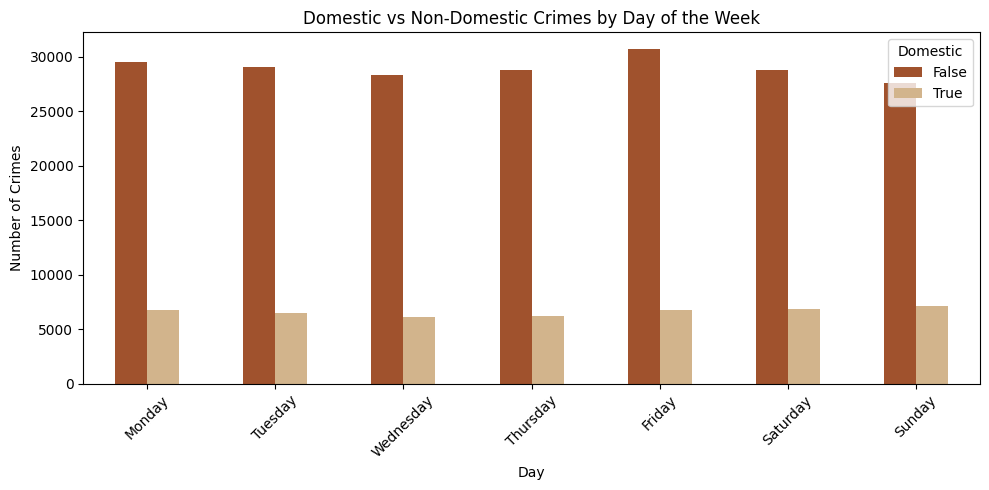

Domestic   False  True
DayOfWeek             
Monday     29502  6760
Tuesday    29098  6482
Wednesday  28331  6098
Thursday   28780  6227
Friday     30701  6797
Saturday   28812  6854
Sunday     27552  7129


In [79]:
day_dom = chicagoc_df.groupby(['DayOfWeek', 'Domestic']).size().unstack()

day_names = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',
    3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}
day_dom.index = day_dom.index.map(day_names)

day_dom.plot(kind='bar', figsize=(10, 5), color = ['#a0522d', '#d2b48c'])
plt.title('Domestic vs Non-Domestic Crimes by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(day_dom)

<h3>Insight 03: Crimes are higher on weekends, especially on Friday, which has the most cases. Non-domestic crimes are always greater than domestic ones, but Sunday shows a slight rise in domestic crimes. Weekdays have steady crime levels, while weekends bring a clear increase, likely due to more social activities. This means law enforcement should focus more on Fridays, Saturdays, and Sundays.</h3>

<hr>
<h2>8. What is the difference in arrest percentage between 2024 and 2025</h2>

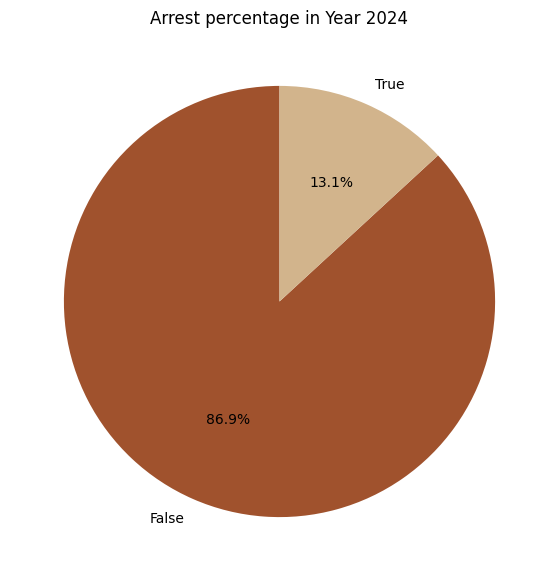

In [94]:
df_24 = crime_2024['Arrest'].value_counts()

plt.pie(df_24,
        labels = df_24.index,
        autopct = '%1.1f%%',
        startangle = 90,
        colors = ['#a0522d', '#d2b48c'])
plt.gcf().set_size_inches(10,7)
plt.title('Arrest percentage in Year 2024')
plt.show()


<h3>Insight 01: In 2024, only 13.1% of cases led to arrests, while 86.9% did not. This shows that most incidents remained unsolved, pointing to low arrest efficiency.</h3>

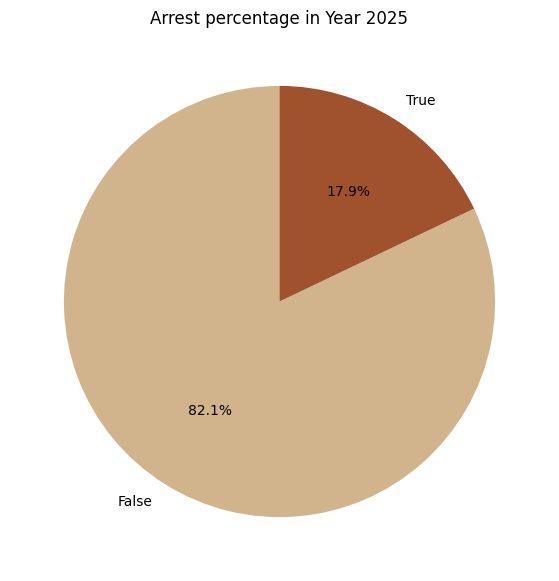

In [92]:
df_25 = crime_2025['Arrest'].value_counts()

plt.pie(df_25,
        labels = df_25.index,
        autopct = '%1.1f%%',
        startangle = 90,
        colors = ['#d2b48c', '#a0522d'])

plt.gcf().set_size_inches(10,7)
plt.title('Arrest percentage in Year 2025')
plt.show()


<h3>Insight 02: 
In 2025, the arrest rate rose to 17.9%, higher than the previous year. Still, 82.1% of cases had no arrests, meaning a large gap in enforcement remained.</h3>

<h3>Insight 03: Comparing the two years, there was a 4.8% increase in arrests, indicating some progress, though the majority of cases remained unresolved.</h3>

<hr>
<h2>8. Weekday vs. Weekend crime differences?</h2>

In [101]:
dayyy = chicagoc_df.groupby(['Primary Type', 'Day']).size().unstack()
dayyy

Day,Weekday,Weekend
Primary Type,,
ARSON,84.0,368.0
ASSAULT,3707.0,18908.0
BATTERY,7435.0,37144.0
BURGLARY,1517.0,6926.0
CONCEALED CARRY LICENSE VIOLATION,49.0,200.0
CRIMINAL DAMAGE,4367.0,22727.0
CRIMINAL SEXUAL ASSAULT,327.0,1246.0
CRIMINAL TRESPASS,1025.0,4020.0
DECEPTIVE PRACTICE,3010.0,11981.0


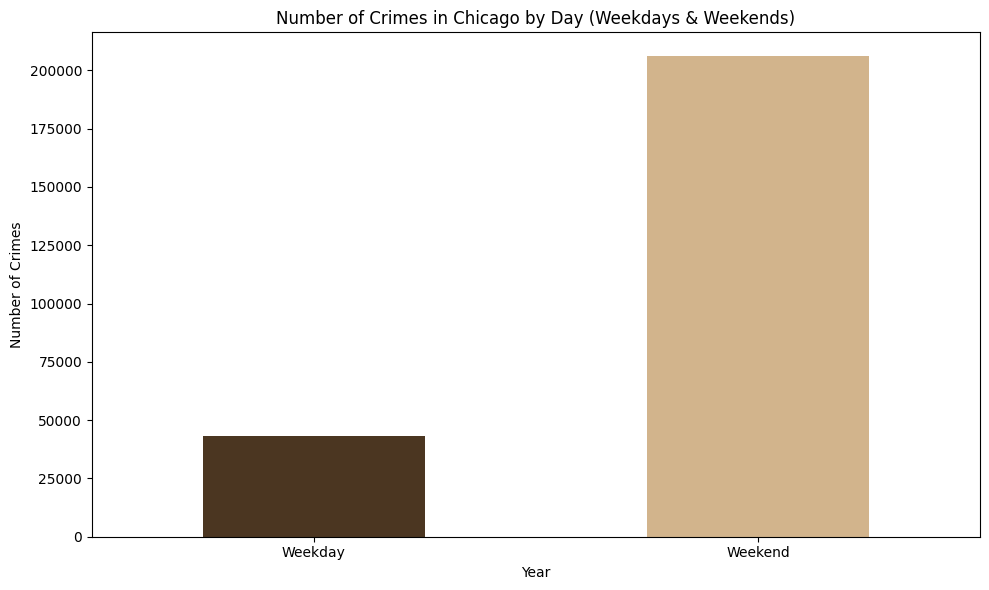

Day
Weekday     43097
Weekend    206026
Name: count, dtype: int64


In [103]:
crimes_each_day = chicagoc_df['Day'].value_counts().sort_index()
crimes_each_day.plot(kind="bar", figsize=(10, 6), color=["#4B3621", "#D2B48C"])

plt.title("Number of Crimes in Chicago by Day (Weekdays & Weekends)")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(crimes_each_day)

<h3>Insight 01: Crimes are far more common on weekends, with 206,062 incidents compared to only 43,097 on weekdays. This shows that weekends have almost three times more crime.</h3>

<h3>Insight 02: Theft and Battery dominate both weekdays and weekends, but their numbers rise sharply during weekends (Battery: 7,435 on weekdays vs 37,144 on weekends; Theft: 9,846 on weekdays vs 49,355 on weekends).</h3>

<h3>Insight 03: Violent crimes such as Assault and Criminal Damage also increase on weekends, showing a pattern where social gatherings and leisure activities may be linked to more conflicts.</h3>

<h3>Insight 04: Even less frequent crimes like Kidnapping, Homicide, and Human Trafficking show higher counts on weekends, which indicates that weekends amplify not only common crimes but also serious ones.</h3>

<hr>
<h2>9. Was there a correlation between the Longitude and Latitude to the crimes> </h2>

In [132]:
geographic_coor = chicagoc_df['Latitude'].corr(chicagoc_df['Longitude'])

In [133]:
geographic_coor

np.float64(-0.5153547682262111)

<h3>Insight: There is no such thing as correlation in crime when it comes to Latitude and Longitude,</h3>